## Getting Started with the Stochastic Conflict Model

#### Table of Contents

1.  <a href="#intro_A">Introduction</a> <br>
2.  <a href="#install_A">How to Install the Python Package</a> <br>
3.  <a href="#run_A">Running the Stochastic Conflict Model</a> <br>
4.  <a href="#gui_A">GUI for the Stochastic Conflict Model</a> <br>
5.  <a href="#visualize_A">Visualizing the Model Output</a> <br>
6.  <a href="#overview_A">Overview of the Stochastic Conflict Model</a> <br>
7.  <a href="#summary_A">Summary</a> <br>
8.  <a href="#refs_A">Key References</a> <br>
9.  <a href="#setup_A">Appendix 1:  Installing in a conda Environment</a>

<!-- Hyperlink IDs must be unique to work in Jupyter Lab when
there are multiple notebooks open. Hence the trailing letter. -->

## Introduction  <a id="intro_A"></a>

The purpose of this Jupyter notebook is to illustrate various ways to run the Stochastic Conflict Model and to visualize the output files.  Background information about the model can be found in section 6: Overview of the Stochastic Conflict Model.

## How to Install the Python Package  <a id="install_A"></a>

Step-by-step instructions for how to install the Stochastic Conflict Model as a Python package in an isolated conda environment are given in <a href="#setup_A">Appendix 1</a>.

Once you have installed the package, you can run the Stochastic Conflict Model at a MacOS/Linux command prompt in a terminal window with:

``` bash
% cd stochastic_conflict_model
% python conflict --cfg_file './input_files/conflict.cfg'
```

## Running the Stochastic Conflict Model (command line)<a id="run_A"></a>

You can run the Stochastic Conflict Model in a Python session as follows.  First, import the Python package. 

In [1]:
import os
src_dir = '/Users/peckhams/Dropbox/GitHub/stochastic_conflict_model'
os.chdir( src_dir )

from conflict.model import conflict

Importing Stochastic Conflict Model package modules:
   conflict.utils
 


Then, create an instance of the model and run it for a particular model configuration file.

In [ ]:
c = conflict.conflict()

# Choose a configuration file
cfg_file = 'input_files/conflict.cfg'
# cfg_file = 'input_files/conflict_Upopcount1.cfg'
# cfg_file = 'input_files/conflict_Upopcount2.cfg'

c.run_model( cfg_file=cfg_file )

## GUI for the Stochastic Conflict Model  <a id="gui_A"></a>

The Stochastic Conflict Model also has a graphical user interface (GUI), built using ipywidgets, that can run in a Jupyter notebook.

In [4]:
from conflict.utils import conflict_gui as cg
cgui = cg.conflict_gui()
cgui.show_gui()

Output()

**Note:** For this GUI, the model domain is currently hard-wired to be the Greater Horn of Africa. The geographic bounding box for this region spans 30 x 30 degrees, with minlat = -5.0, maxlat = 25.0, minlon = 25.0, maxlon = 55.0.  However, the model can be used for other regions by changing these 4 parameters in the model's config file and running it from a Python prompt.

**Note:** The GUI creates a config file with the name shown on the Outputs tab.  That file can also be edited with a text editor.

**Note:** You can use the arrow keys after moving a slider to set an exact number (up to 3 digits after the decimal).

**Note:** After a model run with the GUI, click on the small "console bitmap" at the bottom of the browser window, left of the word Python, to see the console output.

**Note:** If you want to use a spatially uniform grid for U, C1 or C2, simply leave the corresponding text box (e.g. labeled "Unrest Grid File") blank. 

**Note:** The default grid cell size is 450 arcseconds, which is roughly 14 km.  You can perform higher resolution model runs (grid cell size = 300 arcseconds, roughly 9.2 km) by changing "Grid ncols" and "Grid nrows" to 360.  In that case, you can also enter
```
input_files/Horn_of_Africa_GPW-v4_pop_count_2020_300sec.tif
```
into the text boxes labeled "Unrest Grid File" and/or "Connectivity File 1".


## Visualizing the Model Output <a id="visualize_A"></a>

The Stochastic Conflict Model generates two grid stacks that are indexed by time.  One grid stack file is called "conflict.rts" (by default) and contains a 1 for grid cells with conflict and 0 for those without conflict.  The other grid stack is called "conflict_IDs.rts" (by default) and contains unique IDs for grid cells with conflict, that are the same as the ID of the grid cell where that conflict first emerged.  The time step between grids can be taken to be one day.

You can also make movies of these grid stacks.  Click on the Outputs tab, then check the boxes for movies in MP4, WEBM, or both formats.  The WEBM format movies have an opacity of 0.7.

You can visualize any one of the grids in these grid stacks using visualization tools that are included in the Python package, as shown here.


In [5]:
from conflict.utils import visualize as vis
from conflict.utils import rts_files
import os, os.path

### Display One Grid in an RTS File

This section illustrates how to visualize one grid in a time-indexed grid stack that has been saved in the RTS file format.

Byte swap needed = False
Number of grids in RTS file  = 100
Reading one grid from RTS file... 
  time_index = 99
extent = [25.0, 55.0, -5.0, 25.0]
min(grid), max(grid) = 0.0 1.4012985e-38
Finished.



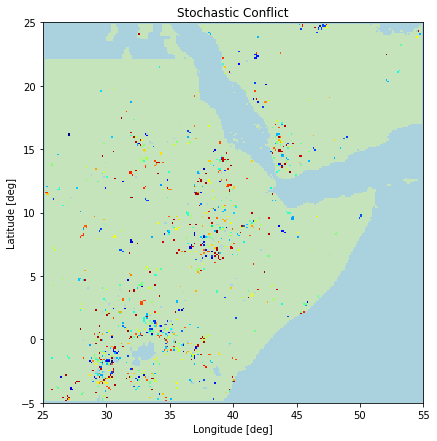

In [55]:
long_name = 'Stochastic Conflict'
rts_filename = '~/output/conflict_IDs.rts'
rts_filename = os.path.expanduser(rts_filename)
rts = rts_files.rts_file()
OK  = rts.open_file( rts_filename )
if not(OK):
    print('Sorry, Could not open RTS file:')
    print( rts_filename )

n_grids = int( rts.number_of_grids() )

# Which grid in grid stack to display?
# time_index = 0               # Display 1st grid
# time_index = 2               # Display 3rd grid
time_index = int(n_grids - 1)  # Display last grid

byte_swap  = rts.byte_swap_needed()
grid   = rts.read_grid( time_index )   # alias to get_grid()
extent = rts.get_bounds()
rts.close_file()

print('Byte swap needed =', byte_swap )
print('Number of grids in RTS file  =', n_grids)
print('Reading one grid from RTS file... ')
print('  time_index =', time_index )
print('extent =', extent)
print('min(grid), max(grid) =', grid.min(), grid.max())
print('Finished.')
print()

# The LAND_SEA_BACKDROP flag provides a geospatial reference.
vis.show_grid_as_image( grid, long_name, extent=extent,
                        LAND_SEA_BACKDROP=True,
                        stretch='linear',
                        ### stretch='hist_equal',
                        # stretch='power', p=0.3,
                        # cmap='rainbow',
                        cmap='jet',
                        # a=1, b=2, p=0.5,
                        xsize=7, ysize=7, dpi=None)

### Display One Grid in a netCDF File

This section illustrates how to visualize one grid in a time-indexed grid stack that has been saved in the netCDF file format.

var_names in netCDF file =
['time', 'datetime', 'X', 'Y', 'conflict_IDs']
long_name = conflict_event__identification_number
var_name  = conflict_IDs
var_units = none
n_grids   = 100
extent = 
[25.0, 55.0, -5.0, 25.0]
grid shape = (240, 240)
min(grid)  = 0
max(grid)  = 10000000



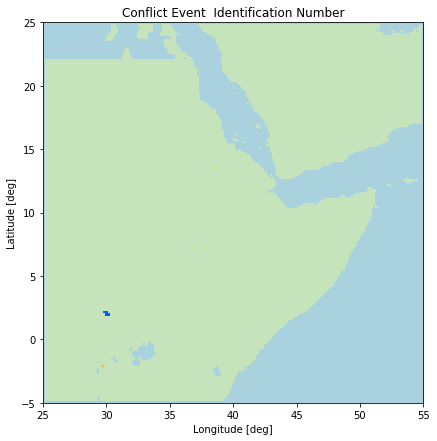

In [5]:
long_name   = 'Stochastic Conflict'
nc_filename = '~/output/conflict_IDs_2D.nc'
nc_filename = os.path.expanduser(nc_filename)

# Which grid in grid stack to display?
# time_index = 0    # Display 1st grid
time_index = 5   # Display 6th grid
# time_index = 10   # Display 11th grid
# time_index = int(n_grids - 1)  # Display last grid

(grid, long_name, extent) = vis.read_grid_from_nc_file(nc_filename,
                                time_index=time_index)
print()

# The LAND_SEA_BACKDROP flag provides a geospatial reference.
vis.show_grid_as_image( grid, long_name, extent=extent,
                        # BLACK_ZERO=True,
                        LAND_SEA_BACKDROP=True,
                        stretch='linear',
                        ### stretch='hist_equal',
                        # stretch='power', p=0.3,
                        # cmap='rainbow',
                        cmap='jet',
                        # a=1, b=2, p=0.5,
                        xsize=7, ysize=7, dpi=None)

## Overview of the Stochastic Conflict Model <a id="overview_A"></a>

Here we describe the model, as currently envisioned and implemented, but this is still a work in progress.  Referring to the last section, let U denote a geospatial grid of values that quantify unrest.
Let C1 denote a geospatial grid of values that quantify the average degree to which people in a given grid cell communicate with people in nearest neighbor (adjacent) grid cells.  Let C2 denote a geospatial grid of values that quantify the average degree to which people in a grid cell communicate with (i.e. send or receive information to/from) people in any other grid cell.  Note:  C2 depends on the degree to which a given cell is connected electronically to the rest of the country (or region or world).  In general, U, C1, and C2 values would be expected to vary both spatially and in time. (These may be estimated by a machine learning algorithm or some other algorithm as functions of selected indicator variables.)

Note:  While TVs, radios and newspapers allow people to receive information, they are much less likely to be used by people to send information to others.  This is in sharp contrast with telephones (cell or land-line), and internet access which allow two-way communication.  In order for information to spread from one cell to another, it has to first be received by some means and then sent or forwarded via two-way communication.  Perhaps we should therefore distinguish between the degree to which people in a grid cell receive information electronically (by TV, radio, newspaper, phone, internet), and the degree to which they send it electronically (only by phone & internet).  The time it takes for a person to act on information received (e.g. forward it, organize a protest, write about it) should probably also be taken into account.

Note:  We could instead define C1 and C2 as follows.  Let B1 and B2 denote the average degree to which any one person can communicate with (1) people in a nearest neighbor grid cell, or (2) people in any other grid cell in the country, respectively.  We could then compute C1 and C2 by multiplying B1 and B2 by the population count of the grid cell.  This would underscore the fact that -- especially for 2-way communication -- the total amount of communication is proportional to population size, and not simply related to the percentage of the population that can communicate electronically.
Conflict Emergence
Let E(i,j,k) denote the event that a conflict emerges during the kth discrete time interval, in the grid cell that has column and row indices i and j.   Let p(i,j,k) be the probability of the event E(i,j,k):

p(i,j,k) = p_emerge(i,j,k) = Prob[ E(i, j, k)]

We assume that p(i,j,k) is an increasing function of U(i,j,k). Initially, we will simply consider the special case where p(i,j,k) is proportional to U(i,j,k), so that:

if (S(i,j,k) = 0), &nbsp; p(i,j,k) = c_emerge * U(i,j,k) / max_i,j \[ U(i,j,k) \]<br>
if (S(i,j,k) = 1), &nbsp; p(i,j,k) = 0,<br>

where c_emerge is in (0,1].  Here, we have normalized the grid U(i,j,k) and then multiplied the result by a constant, c.    Dividing by the array max and multiplying by a model parameter c in (0,1] guarantees that 0 <= p(i,j,k) < 1 for every grid cell --- as it must since it is a probability.  Note that the parameter c can be adjusted to make conflicts more or less likely to occur.  In the special case where all values in the U grid are equal, all cells will have the same probability of conflict emergence: p_emerge = c_emerge.   (Note: Instead of dividing by the array max, we could have divided by the array sum, but then the upper bound on c is more complicated.)

Let S be a geospatial grid with the same dimensions as U, C1 and C2, such that the value of a grid cell in S is 1 if the cell is experiencing (or engaged in) a conflict, and 0 otherwise.  For each model timestep, and for each grid cell, generate an independent, random variable from a Bernoulli distribution (see Bernoulli Distribution, 2021)  such that:

S(i,j,k) = 1 with probability p(i,j,k) and<br>
S(i,j,k) = 0 with probability (1 - p(i,j,k)).<br>

Recall that the E(S(i,j,k) = p(i,j,k) for a Bernoulli random variable.  Also recall that the expected value of a sum of random variables is equal to the sum of their expected values, even if they are not independent.  Therefore, the expected number of grid cells in which a conflict is initiated in the 1st time interval (k=1, before any spreading) is given by:

   E( Sum_i,j [S(i,j,1)] = ( total conflicts in 1st interval ) = Sum_i,j [p(i,j,1)]

The expected number of grid cells in which a conflict is initiated in the kth time interval (k >1, before spreading), will be less than this since cells already experiencing conflict (i.e. with S=1) are excluded (i.e. for them, p(i,j,k) = 0).
Conflict Spreading
For every grid cell that has S(i,j,k) = 1, the next step is to determine if conflict spreads to other grid cells (which could be nearest neighbors or far away due to electronic connectivity).  If it does, the spreading process is repeated for those other grid cells until there is no further spreading.  (That is, no cells have their S value changed to 1.)  Since there is a lag time between cell-to-cell communication and a resulting action (to spread conflict into a new cell), we introduce a time lag parameter, tau, which can be taken to be a multiple of the model timestep. (In the current version of the model, tau = 1.)

There are 4 special cases of spreading that can be considered:
Case 1:  no spreading,
Case 2:  spreading only by local connectivity,
Case 3:  spreading by only nonlocal connectivity, and
Case 4:  spreading by both local and nonlocal connectivity. 
For the last three of these cases, various spreading rules are also possible.

Case 1.  No spreading.  While there may be conflict in many cells, there is no spreading of conflict to other grid cells.

Case 2.  Spreading only by local connectivity.  In this case, conflict can only spread from a grid cell with conflict to other grid cells that have sufficiently high C1 and U values.  Cells with a high C1 value should include nearest neighbor grid cells and possibly other cells, such as those separated by a very short travel time.  In the current version of the model, the probability of spreading to any nearest neighbor is weighted by the U value of that neighbor, i.e.

 			p(n) = c_spread * U(n) / max_n(U(n)), 

where c_spread is in (0,1] and n is a nearest neighbor index.  If U is zero for all neighbors, then p=0.  Notice that conflict cannot spread to a neighbor that has U=0, and this should include grid cells in a lake or in the ocean, for example.  In the current version, conflict cannot “spread to” or “re-emerge” in a cell that already has conflict,  but this could be changed.  Various other spreading rules are also possible, such as:
 
(a) Conflict will spread to any neighbor, n, such that U(n) > U0, where U0 is a threshold value.
(b) Conflict will spread to any neighbor, n, such that U(n) >= a * U(i), with a in (0,1].
(c)  The probability of spreading to any neighbor is weighted by the U and C1 values of that neighbor, for example using:

p(n) = c_spread * [U(n) * C1(n)] / max_n [ U(n) * C1(n) ],

where c_spread is in (0,1].  Here, the probability of spreading to a neighbor is low if either U(n) or C1(n) is low.

Case 3.  Spreading only by nonlocal connectivity.  In this case conflict can spread from a grid cell with conflict to any other grid cells that have sufficiently high C2 and U values.

Case 4.  Spreading by both local and nonlocal connectivity.  In this case, conflict can spread from a cell with conflict to:

(1a) any of its nearest neighbor grid cells if its own C1 value is sufficiently high, and if their value of U is sufficiently high,   OR
(1b) any of its nearest neighbor grid cells with sufficiently high C1 and U values.

(2) any other grid cell with sufficiently high C2 and U values.
Conflict Duration
For every grid cell that had its S value set to 1 in the kth time interval (by emergence/triggering or spreading), generate an independent random variable from a Bernoulli distribution (Bernoulli Distribution, 2021) with parameter, p_resolve.  If B=1, the conflict is resolved in time interval k and if B=0 the conflict continues.  If we take X to be the random number of time intervals before the conflict is resolved, which is the duration of the conflict, then X will have a Geometric distribution (Geometric Distribution, 2021) with parameter p_resolve.  The expected value of this random duration is then equal to 1/p_resolve. (So a smaller value of p_resolve results in a larger mean duration.)  As long as conflict is active within a cell (some number of timesteps) it will attempt to spread to other cells.
Expected Results
Depending on the values of the model parameters U, C1, C2, c_emerge, c_spread and p_resolve, this model can exhibit a wide range of behaviors, from rare conflicts that remain isolated to conflicts that spread to fill an entire region.  Preliminary mathematical analysis of this model as well as early simulations suggests that if the model parameters are assumed not to vary with time, then this model may evolve toward a “statistical steady-state” condition where:

(1) the mean rate at which new conflicts appear (by either emergence or spreading) eventually becomes equal to the mean rate at which they are resolved, and therefore

(2) the mean number of grid cells that are experiencing conflict in the kth time interval approaches a constant.

For details, see Appendix 1:  Preliminary Mathematical Results.


## Summary  <a id="summary_A"></a>

This model is capable of displaying a wide variety of conflict scenarios, depending on the parameter settings as well as the unrest grid, U, and the local and nonlocal connectivity grids, C1 and C2.  The unrest grid, U, determines the likelihood that conflict will emerge in any given grid cell, while the connectivity grids determine the likelihood that conflicts will spread.  This model is a work in progress, and summary statistics for adminstrative zones can be computed later from the output files.

## References  <a id="refs_A"></a>

ACLED (2021a) Curated Data, https://acleddata.com/curated-data-files/, Accessed May 25, 2021

ACLED (2021b) Conflict Pulse Model, Armed Conflict Location and Event Data (ACLED) project, https://acleddata.com/conflict-pulse/.

Arab Spring (2021) Wikipedia, https://en.wikipedia.org/wiki/Arab_Spring, Accessed: May 12, 2021

Asynchronous Cellular Automaton (2021), Wikipedia, (see random independent update scheme) https://en.wikipedia.org/wiki/Asynchronous_cellular_automaton

Bernoulli Distribution (2021), Wikipedia, https://en.wikipedia.org/wiki/Bernoulli_distribution, Accessed: May 12, 2021

Binary Regression (2021), Wikipedia, https://en.wikipedia.org/wiki/Binary_regression, Accessed: May 31, 2021

Binomial Distribution (2021), Wikipedia, https://en.wikipedia.org/wiki/Binomial_distribution, Accessed: May 12, 2021

Boschee, E., J. Lautenschlager, S. O'Brien, S. Shellman, J. Starz (2018) ICEWS Weekly Event Data, https://doi.org/10.7910/DVN/QI2T9A, Harvard Dataverse, V278

Boschee, E., J. Lautenschlager, S. O'Brien, S. Shellman, J. Starz, M. Ward (2015) ICEWS Coded Event Data, https://doi.org/10.7910/DVN/28075, Harvard Dataverse, V30, UNF:6:NOSHB7wyt0SQ8sMg7+w38w== [fileUNF]

Boschee, E., J. Lautenschlager, S. Shellman, A. Shilliday (2015) ICEWS Dictionaries, https://doi.org/10.7910/DVN/28118, Harvard Dataverse, V4, UNF:6:WBLzLxVC+rRZzmsx/wwtHA== [fileUNF]

Cellular Automaton (2021), Wikipedia, https://en.wikipedia.org/wiki/Cellular_automaton, Accessed: May 13, 2021

Clifford, P. and A. Sudbury (1973) A model for spatial conflict, Biometrika, Vol. 60, No. 3, pp. 581-588, Oxford University Press, https://www.jstor.org/stable/2335008

Combustibility and Flammability (2021) Wikipedia, https://en.wikipedia.org/wiki/Combustibility_and_flammability, Accessed: May 13, 2021

Compartmental Models (2021) Compartmental models in epidemiology, Wikipedia, https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology, Accessed: May 14, 2021.

Drossel, B. and F. Schwabl (1992) Self-organized critical forest-fire model, Physical Review Letters, Vol. 69, No. 11.

Exponential Distribution (2021) Wikipedia, https://en.wikipedia.org/wiki/Exponential_distribution, Accessed: May 14, 2021

Forest-fire Model (2021), Wikipedia, https://en.wikipedia.org/wiki/Forest-fire_model, Accessed: May 12, 2021

Funsten, R. (2016) How understanding conflict can help improve our lives, TEDxTryon, YouTube, https://www.youtube.com/watch?v=fdDQSHyyUic, 11 min, 58 sec.

GDELT Project (2021) A global database of events, https://www.gdeltproject.org/

Geometric Distribution (2021) Wikipedia, https://en.wikipedia.org/wiki/Geometric_distribution, Accessed: May 14, 2021

Goldstone, J.A. (2002) Population and security: How demographic change can lead to violent conflict, Journal of International Affairs, Vol. 56, No. 1, 20 pp. 

Hadley, L, (2019) Borders and the feasibility of rebel conflict, Borders in Globalization Review, Vol. 1, No. 1, pp. 66-82, https://doi.org/10.18357/bigr11201919259 

Halkia, M., S. Ferri, M. Papazoglou, M-S. van Damme, G. Jenkinson, K-M. Baumann, D. Thomakos (2019) Dynamic global conflict risk index, JRC Technical Reports, European Commission, Publications Office of the EU, https://doi.org/10.2760/846412.

Halkia, M., S. Ferri, M. Papazoglou, M-S. van Damme, D. Thomakos (2020) Conflict event modelling: Research experiment and event data limitations, Conference: LREC 2020 Workshop on Automated Event Extraction of Socio-political Events from News (AESPEN2020), Marseille, France. https://www.researchgate.net/publication/341378782_Conflict_Event_Modelling_Research_Experiment_and_Event_Data_Limitations

Hamblin, R.L., M. Hout, J.L.L. Miller, B.L. Pitcher (1977) Arms races:  A test of two models, American Sociological Review, Vol. 42, No. 2 (April 1977), pp. 338-354, https://doi.org/10.2307/2094609

Hatfield and McCoy Feud (2021), Wikipedia, https://en.wikipedia.org/wiki/Hatfield%E2%80%93McCoy_feud, Accessed: May 12, 2021, classic example of self-perpetuated conflict.

Infectious Disease Models (2021), Mathematical modeling of infectious disease, Wikipedia, https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease, Accessed: May 14, 2021.

Kim, M., K., D. Paini, and R. Jurdak (2019) Modeling stochastic processes in disease spread across a heterogeneous social system, Proceedings of the National Academy of Sciences, Vol. 116, No. 2, 401-406, https://doi.org/10.1073/pnas.1801429116.

Lee, E.D., B.C. Daniels, C.R. Myers, D.C. Krakauer, and J.C. Flack (2020a) Scaling theory of armed-conflict avalanches, Physical Review E, Vol. 102, No. 042312, 12 pp., 		 	http://doi.org/10.1103/PhysRevE.102.042312

Lee, E.D., B.C. Daniels, C.R. Myers, D.C. Krakauer, and J.C. Flack (2020b) Emergent regularities and scaling in armed conflict data, arXiv:1903.07762v4 [physics.soc-ph].

Logistic Regression (2021), Wikipedia, https://en.wikipedia.org/wiki/Logistic_regression, Accessed: May 12, 2021

Morrow, J.D. (1986) A spatial model of international conflict, The American Political Science Review, Vol. 80, No. 4 (Dec. 1986), pp. 1131-1150, American Political Science Association, Stable URL: https://www.jstor.org/stable/1960860.

Nailufar, B., S. Wijaya, and D. Perwitasari (2015) Landscape modeling for human - Sulawesi crested black macaques conflict in North Sulawesi, Procedia Environmental Sciences, 24, pp. 104-110. http://doi.org/10.1016/j.proenv.2015.03.014. (example of logistic regression)

Rustad, S.A., H. Buhaug, Å. Falch, and S. Gates (2011)  All conflict is local: Modeling subnational variation in civil conflict risk, Conflict Management and Peace Science, Vol. 28, No. 1, pp. 15-40.

UCDP (2021) Uppsala Conflict Data Program, https://www.pcr.uu.se/research/ucdp/.

USAID (2012) Conflict Assessment Framework: Application Guide, United States Agency for International Development. 48 pp., https://pdf.usaid.gov/pdf_docs/PNADY740.pdf

ViEWS (2021) A political Violence Early Warning System, Dept. of Peace and Conflict Research, Uppsala University, https://www.pcr.uu.se/research/views/.

Walther, O.J., S.M. Radil, D.G. Russell, and M. Trémolières (2020) Introducing the Spatial Conflict Dynamics indicator of political violence, arXiv:2003.01750v2 [physics.soc-ph].

Yurevich, P.A., M.A. Olegovich, S.V. Mikhailovich, and P.Y. Vasilievich (2018) Modeling conflict in a social system using diffusion equations, Simulation: Transactions of the Society for Modeling and Simulation International, Vol. 94, No. 12, pp. 1053-1061, http://doi.org/10.1177/0037549718761573.

## Appendix 1: Installing in a conda Environment  <a id="setup_A"></a>

To run this Jupyter notebook, it is recommended to use Python 3.7 or higher from an Anaconda distribution and to install the required Python packages in a conda environment called <b>conflict</b>.  This prevents conflicts with other Python packages you may have installed.
The Anaconda distribution includes many packages from the
[<b>Python Standard Library</b>](https://docs.python.org/3/library/).

First, download the Conflict package from GitHub repo "conflict" at:
<b>https://github.com/peckhams/stochastic_conflict_model</b>.
Copy or unzip the package into some directory on your computer.  Let's refer to this full path as CM_DIR.  e.g. CM_DIR = /Users/peckhams/Dropbox/stochastic_conflict_model

Installing Conflict with pip causes most of its dependencies to be installed automatically.  However, if you want to run the growing collection of Jupyter notebooks (such as this one) that highlight Conflict functionality, you will also need to install the
[<b>nb_conda</b>](https://docs.anaconda.com/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/) package, and optionally the <b>jupyterlab</b> package (see below).
In addition, some of the new Conflict utilities (e.g. regrid.py and visualize.py) require the
[<b>gdal</b>](https://pypi.org/project/GDAL/) and
[<b>matplotlib</b>](https://matplotlib.org/) packages.
Simply type the following commands at an OS prompt after installing Anaconda and downloading Conflict.

``` bash
% conda update -n base conda
% conda create --name conflict python=3.7 anaconda
% conda activate conflict
% conda list
% conda install numpy
% conda install pandas
% conda install nb_conda
% conda install jupyterlab
% conda install gdal
% conda install matplotlib
% conda install imageio
% conda install netCDF4
% conda install pip
% pip install imageio-ffmpeg  (an imageio extension)
% cd CM_DIR
% pip install -e .   (-e is the editable/developer option)
```

<b>Note:</b>  The <b>pip</b> package manager is used to install Conflict, since it is not available as a conda package.  (It gets installed when you install <b>nb_conda</b>.) However, like conda, pip will install a package and its dependencies into the currently active conda environment, as explained
[<b>in these docs</b>](https://docs.conda.io/projects/conda/en/4.6.1/user-guide/tasks/manage-pkgs.html#installing-non-conda-packages).  If you switch to another environment with <b>conda activate envname</b>, you can confirm that topoflow (or cfunits, gdal, netcdf4, etc.) is not there with <b>conda list</b>. 

<b>Note:</b>  Some of the Conflict utilities use a Python package version of [<b>GDAL</b>](https://pypi.org/project/GDAL/).  At the time of this writing, installing <b>gdal</b> from the <b>conda-forge </b> with <i>conda install -c conda-forge gdal</i> did not work.

#### <b>Conda Environments</b>

Note that <b>conda</b> is the name of the package manager for the popular Anaconda Python distribution.  One feature of conda is support for multiple environments, which are isolated from one another.  When you install Anaconda, an environment called <b>base</b> is created for you and a base set of commonly-used Python packages are installed there.  However, you can (and should!) create additional, named environments and install different sets of Python packages into them without worrying about potential conflicts with packages in other environments.  Type <b>conda env list</b> to list your available environments.  You can switch to one of your other environments using the command <b>conda activate envname</b>.  (Replace "envname" with the name of an environment.) You can switch back to the base environment with the command <b>conda deactivate</b>.  It is better not to install new packages into the base environment.  See the online conda documentation on [<b>Managing Environments</b>](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for more information.

It is always a good idea to update conda itself before creating new environments and installing packages in them. The "-n" flag is followed by the name of the environment to update, and the "-c" flag is followed by the name of the <b>channel</b> from which to get packages.  A channel is a collection of Python packages that are provided and maintained by some group.  The word "defaults" refers to
[<b>Anaconda's own collection</b>](https://docs.anaconda.com/anaconda/packages/pkg-docs/), while
[<b>conda-forge</b>](https://conda-forge.org/feedstocks/)
refers to another popular collection and the GitHub organization that maintains it.  Many Python packages are available from both of these channels.  (However, the ipyleaflet and pydap  packages are currently not available in the Anaconda collection.) When you are installing several packages into an environment, the potential for installation problems seems to be less if you get them all from the same channel.  Keep in mind that packages you install will likely depend on many other Python packages, so there is a potential for conflicts, usually related to different package versions.  Using conda environments helps to mitigate against this and helps with <b>reproducibility</b>.

Once you've switched to an environment with <b>conda activate envname</b>, you can type <b>conda list</b> to see a list of packages.  If you do this right after you create a new environment you will see that it contains no packages.  If you do this right after installing each package above you will see that:

<ul>
    <li>Installing <b>nb_conda</b> triggers installation of <b>nb_conda_kernels</b> (2.2.3),
        <b>ipykernel</b> (5.3.0), <b>notebook</b> (6.0.3), <b>pip</b> (20.0.2),
        <b>setuptools</b> (46.4.0) and <b>traitlets</b> (4.3.3), among many others. 
    <li>Installing <b>gdal</b> triggers installation of osr, etc.
    <li>Installing <b>matplotlib</b> triggers installation of ##########. 
</ul>

#### <b>Jupyter Notebook Extensions</b>

Note that <b>nb_conda</b> is installed first above, and triggers installation of <b>nb_conda_kernels</b> along with <b>notebook</b>.  This is important as it makes your Jupyter notebook app aware of your conda environments and available in the app as "kernels".  Anaconda provides a helpful page on the
[<b>Jupyter Notebook Extensions</b>](https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/).
That page also explains how you can enable or disable these extensions individually. The command <b>jupyter nbextension list</b> shows you the extensions that are installed and whether they are enabled.  If you run the <b>jupyter notebook</b> or <b>jupyter lab</b> command in an environment that has <b>nb_conda_kernels</b> installed (see below), you will have the ability to associate one of your available conda environments with any new notebook you create.  Different environments give rise to different <b>kernels</b> in Jupyter, and the kernel name includes the environment name, e.g. <b>Python \[conda env:tf36\]</b>.  The kernel name is displayed in the upper right corner.  Notebooks typically open with the "environment kernel" they were created with. However, there is a <b>Change Kernel</b> option in the <b>Kernel</b> menu in the Jupyter app menu bar. (After changing the kernel, you may need to choose <b>Restart</b> from the <b>Kernel</b> menu.

#### <b>Cloning a conda Environment</b>

If your notebook is working but then you want to import additional packages (possibly with many dependencies, and potential for problems), you can keep the first environment but clone it with
<b><i>conda create --name clonename --copy --clone envname</i></b>,
and then install the additional packages in the clone.  This way, you can switch to the new environment's kernel and try to run your notebook, but if you run into any problems you can easily revert back to the original environment and functionality.

<b>Note:</b> Setting the "--copy" flag installs all packages using copies instead of hard or soft links.  This is necessary to avoid problems when using <b>pip</b> together with <b>conda</b> as described [<b>on this page</b>](https://stackoverflow.com/questions/43879119/installing-tensorflow-in-cloned-conda-environment-breaks-conda-environment-it-wa).

#### <b>Running Notebooks in the Jupyter Notebook App</b>

When you want to run the notebook, type <b>conda activate tf36</b> (at an OS command prompt) to activate this environment.  Then change to the directory that contains this notebook and type <b>jupyter notebook</b>.  By default, this folder is called <b>Jupyter</b> and is in your home directory.  In the app, choose this notebook by name, "TopoFlow_Getting_Started.ipynb", and make sure to choose the kernel called:  <b>Python \[conda env:tf36\]</b>.  See the References section at the end for more info.

#### <b>Running Notebooks in the JupyterLab App</b>

The
[<b>JupyterLab</b>](https://jupyterlab.readthedocs.io/en/stable/index.html)
app is a cool, new successor to the Notebook app and offers many additional features.  If you want to use this notebook in JupyterLab, you need to install one more Python package, as follows.

``` bash
% conda activate conflict
% conda install jupyterlab
```

You launch the JupyterLab app by typing <b>jupyter lab</b> instead of <b>jupyter notebook</b>.  To quit, choose <b>Logout</b> or <b>Shutdown</b> from the app's <b>File</b> menu.

#### <b>JupyterLab Extensions</b>

The Jupyter project provides documentation on
[<b>JupyterLab Extensions</b>](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
which add capabilities to JupyterLab.  For example, after installing jupyterlab (see just above), if you want to use the <b>ipywidgets</b> and <b>ipyleaflet</b> Python packages, you need to install two extensions, as follows:
```
% conda activate tf36
% jupyter labextension install jupyter-leaflet
% jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
To list the jupyter labextensions you have, and to see whether or not they are enabled, type <b>jupyter labextension list</b>.  <b>Note:</b> If you start jupyterlab from a conda environment in which a given extension is not installed, and then open or switch to a notebook which uses a different "environment kernel", one that requires that extension, the notebook may not work.

You should only install trusted extensions, due to security concerns, as explained in the documentation.  Third-party extensions pose a potential security risk.  An extension that allows you to play MP4 movie files in JupyterLab is
[<b>available on GitHub</b>](https://github.com/jupyterlab/jupyterlab-mp4)
(by Ian Rose of the JupyterLab organization)
and can be installed with the command:
```
% jupyter labextension install @jupyterlab/mp4-extension
```
<b>Note:</b> This command is from a pull-request on the extension's github repo.
Using the command: "jupyter labextension install jupyterlab-mp4" results in the
following error message:<br>
An error occured.
ValueError: "jupyterlab-mp4" is not a valid npm package

As of May 27, 2020, JupyterLab has added an experimental <b>Extension Manager</b> which can be enabled by choosing Settings > Enable Extension Manager in the app.